In [1]:
# imports
import os
import re
import pafy
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [207]:
from googletrans import Translator

In [82]:
df_all = pd.read_csv('all_data.csv')

In [250]:
len(df_all)

2730

In [252]:
df_all_big_view = df_all[df_all["viewcount"] > qviews]
df_all_big_view.describe()

df_all_long_length = df_all[df_all["length"] > qlength]
df_all_long_length.describe()

,Unnamed: 0,dislikes,length,likes,rating,subscribers,viewcount,subscriberCount
count,137.000000,137.000000,137.000000,137.000000,137.000000,137.000000,137.000000,137.000000
mean,1602.116788,3.686131,2505.941606,46.766423,4.179477,166.693431,22960.394161,61750.007299
std,659.660441,11.113553,3941.232425,123.009939,1.512750,71.164635,51473.337615,108105.998412
min,72.000000,0.000000,787.000000,0.000000,0.000000,101.000000,23.000000,0.000000
25%,1147.000000,0.000000,900.000000,3.000000,4.368421,101.000000,740.000000,1508.000000
50%,1816.000000,1.000000,1171.000000,14.000000,4.805825,201.000000,4842.000000,6835.000000
75%,2095.000000,4.000000,1960.000000,50.000000,5.000000,201.000000,28754.000000,27554.000000
max,2728.000000,108.000000,29730.000000,1218.000000,5.000000,301.000000,437986.000000,277633.000000


In [4]:
import datetime as dt

# Get Current Time
current_time = pd.to_datetime(dt.datetime.now())
current_time = (current_time - dt.datetime(1970,1,1)).total_seconds()

print(current_time)

1541560972.1954129


In [83]:
# Remving outliers
qviews = df_all["viewcount"].quantile(0.99)
qlength = df_all["length"].quantile(0.95)

df_all_num_lf = df_all[df_all["viewcount"] < qviews]
# 2702 obs after filter
# df_all_num_lf.describe()

df_all_num_lf_lf = df_all_num_lf[df_all_num_lf["length"] < qlength]
# 2567 obs after filter
# df_all_num_lf_lf.describe()

# Selecting numeric columns
columns = ['length','likes','dislikes','rating','date_published','viewcount','subscriberCount']
df_all_num = pd.DataFrame(df_all_num_lf_lf, columns=columns)

# Converting date published to epoch
df_all_num['date_published'] = pd.to_datetime(df_all_num['date_published'])
df_all_num['date_published'] = (df_all_num['date_published'] - dt.datetime(1970,1,1)).dt.total_seconds()

# Add time since published column
df_all_num['time_since_published'] = current_time - df_all_num['date_published']

print(df_all_num)

      length  likes  dislikes    rating  date_published  viewcount  \
0        543    0.0       0.0  0.000000    1.272672e+09        150   
1         24    6.0       0.0  5.000000    1.224725e+09       3745   
2         52    1.0       0.0  5.000000    1.365526e+09        262   
3         26    3.0       1.0  4.000000    1.195130e+09       5148   
4        415    1.0       0.0  5.000000    1.369036e+09         34   
5         56    0.0       0.0  0.000000    1.226965e+09        712   
6        621   10.0       0.0  5.000000    1.370207e+09       2695   
7          6    0.0       0.0  0.000000    1.196091e+09         19   
8        589    0.0       0.0  0.000000    1.348449e+09         36   
9        596    0.0       0.0  0.000000    1.369108e+09         29   
10        86    0.0       0.0  0.000000    1.352587e+09        433   
11       194    0.0       0.0  0.000000    1.271176e+09         21   
12       598    1.0       0.0  5.000000    1.349069e+09        126   
13       298    5.0 

In [186]:
viewlike_ratio = np.mean((df_all_num['viewcount']+1) / (df_all_num['likes']+1))
viewdislike_ratio = np.mean((df_all_num['viewcount']+1) / (df_all_num['dislikes']+1))
print(viewlike_ratio)
print(viewdislike_ratio)

646.6092996400587
3805.935216941795


In [84]:
# Number of nan
num_na = df_all_num.isna().sum()
print(num_na)

df_all_num = df_all_num.fillna(0)

length                   0
likes                   34
dislikes                34
rating                   0
date_published           0
viewcount                0
subscriberCount          0
time_since_published     0
dtype: int64


/usr/local/lib/python3.5/dist-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


Text(0.5,1,'Length Distribution')

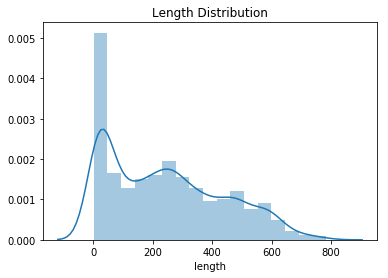

In [85]:
import seaborn as sns

sns.distplot(df_all_num.loc[:,'length'])
plt.title('Length Distribution')

/usr/local/lib/python3.5/dist-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


Text(0.5,1,'Likes Distribution')

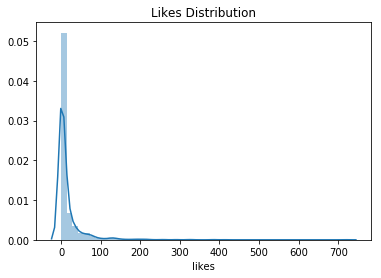

In [86]:
sns.distplot(df_all_num.loc[:,'likes'])
plt.title('Likes Distribution')

/usr/local/lib/python3.5/dist-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


Text(0.5,1,'Dislikes Distribution')

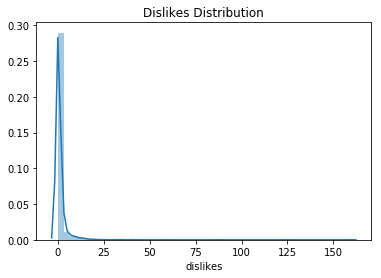

In [87]:
sns.distplot(df_all_num.loc[:,'dislikes'])
plt.title('Dislikes Distribution')

/usr/local/lib/python3.5/dist-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


Text(0.5,1,'Rating Distribution')

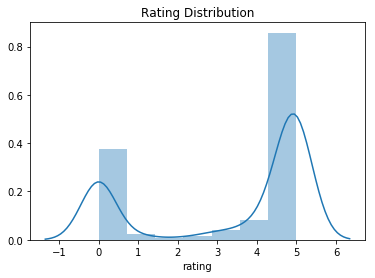

In [88]:
sns.distplot(df_all_num.loc[:,'rating'])
plt.title('Rating Distribution')

/usr/local/lib/python3.5/dist-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


Text(0.5,1,'Date Published Distribution')

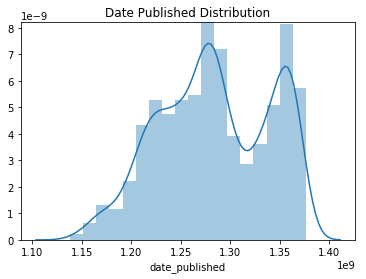

In [89]:
sns.distplot(df_all_num.loc[:,'date_published'])
plt.title('Date Published Distribution')

/usr/local/lib/python3.5/dist-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


(0, 200000)

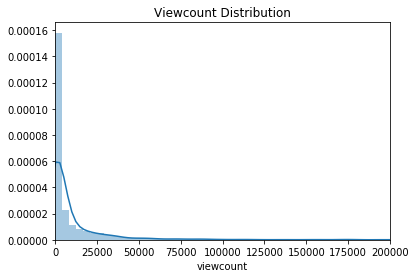

In [151]:
sns.distplot(df_all_num.loc[:,'viewcount'])
plt.title('Viewcount Distribution')
# Goes up to 200,000
plt.xlim(0, 200000)

In [32]:
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer

In [92]:
def analyze_sentiment(df):
    sentiments = []
    sid = SentimentIntensityAnalyzer()
    for i in range(df.shape[0]):
        line = df.iloc[i,0]
        sentiment = sid.polarity_scores(line)
        sentiments.append([sentiment['neg'], sentiment['pos'],
                           sentiment['neu'], sentiment['compound']])
    df[['neg', 'pos', 'neu', 'compound']] = pd.DataFrame(sentiments)
    df['Negative'] = df['compound'] < -0.1
    df['Positive'] = df['compound'] > 0.1
    return df

In [258]:
translator = Translator()

# col_title = ['title']
# title = pd.DataFrame(df_all_num_lf_lf, columns=col_title).astype(str)
# translations = translator.translate(title.loc[2,'title'])
# print(title_english)
# print(title)

In [93]:
# Analyze sentiment in title
col_title = ['title']
title = pd.DataFrame(df_all_num_lf_lf, columns=col_title).astype(str)
title_sent = analyze_sentiment(title)
title_sent = title_sent.add_suffix('_title')
print(title_sent.head())

# Analyze sentiment in description
col_description = ['description']
description = pd.DataFrame(df_all_num_lf_lf, columns=col_description).astype(str)
description_sent = analyze_sentiment(description)
description_sent = description_sent.add_suffix('_description')
print(description_sent.head())

# # Analyze sentiment in keywords
# col_keywords = ['keywords']
# keywords = pd.DataFrame(df_all, columns=col_keywords)
# keywords_sent = analyze_sentiment(keywords)
# print(keywords_sent.head())

                                      title_title  neg_title  pos_title  \
0        Biosite Flag Football Super Bowl 2010 V2      0.000      0.394   
1     East Orange Rams Flag football "boobie doo"      0.000      0.000   
2  Jugada de Cross Pase tochito Morgan vs Chotes.      0.000      0.000   
3        Flag Football Block - Hit Las Vegas 2007      0.326      0.000   
4               Jaxson's Flag Football Highlights      0.000      0.000   

   neu_title  compound_title  Negative_title  Positive_title  
0      0.606          0.5994           False            True  
1      1.000          0.0000           False           False  
2      1.000          0.0000           False           False  
3      0.674         -0.4404            True           False  
4      1.000          0.0000           False           False  
                             description_description  neg_description  \
0  Biosite Football League... White Shadows 2010 ...            0.000   
1  My son Playing his 2nd

In [94]:
# Selecting columns that we plan to use from sentiment
cols_sent_title = ['compound_title']
title_1 = pd.DataFrame(title_sent, columns=cols_sent_title)
print(title_1.head())
print(len(title_1))

cols_sent_description = ['compound_description']
description_1 = pd.DataFrame(description_sent, columns=cols_sent_description)
print(description_1.head())
print(len(description_1))

df_all_sent = pd.concat([title_1, description_1], axis = 1)
print(df_all_sent.head())

   compound_title
0          0.5994
1          0.0000
2          0.0000
3         -0.4404
4          0.0000
2567
   compound_description
0                0.4753
1                0.1027
2                0.0000
3                0.0387
4                0.9579
2567
   compound_title  compound_description
0          0.5994                0.4753
1          0.0000                0.1027
2          0.0000                0.0000
3         -0.4404                0.0387
4          0.0000                0.9579


In [141]:
# Adding numeric features and sentiment values
df_all_num_sent = pd.concat([df_all_num, df_all_sent], axis = 1)
print(df_all_num_sent.head())
print(df_all_num_sent.describe())

   length  likes  dislikes  rating  date_published  viewcount  \
0     543    0.0       0.0     0.0    1.272672e+09        150   
1      24    6.0       0.0     5.0    1.224725e+09       3745   
2      52    1.0       0.0     5.0    1.365526e+09        262   
3      26    3.0       1.0     4.0    1.195130e+09       5148   
4     415    1.0       0.0     5.0    1.369036e+09         34   

   subscriberCount  time_since_published  compound_title  compound_description  
0                2          2.688895e+08          0.5994                0.4753  
1               33          3.168361e+08          0.0000                0.1027  
2                2          1.760353e+08          0.0000                0.0000  
3                5          3.464310e+08         -0.4404                0.0387  
4                5          1.725254e+08          0.0000                0.9579  
            length        likes     dislikes       rating  date_published  \
count  2567.000000  2567.000000  2567.000000  

In [142]:
# Number of nan
num_na_final = df_all_num_sent.isna().sum()
print(num_na_final)

df_all_num_sent = df_all_num_sent.fillna(0)
num_na_final = df_all_num_sent.isna().sum()
print(num_na_final)

length                    0
likes                     0
dislikes                  0
rating                    0
date_published            0
viewcount                 0
subscriberCount           0
time_since_published      0
compound_title          154
compound_description    154
dtype: int64
length                  0
likes                   0
dislikes                0
rating                  0
date_published          0
viewcount               0
subscriberCount         0
time_since_published    0
compound_title          0
compound_description    0
dtype: int64


In [143]:
# Log transform
df_all_num_sent_log = np.log10(df_all_num_sent+1)
print(df_all_num_sent_log.describe())

            length        likes     dislikes       rating  date_published  \
count  2567.000000  2567.000000  2567.000000  2567.000000     2567.000000   
mean      2.148049     0.693697     0.169110     0.543379        9.108142   
std       0.555911     0.645081     0.298158     0.337389        0.018936   
min       0.477121     0.000000     0.000000     0.000000        9.056204   
25%       1.740363     0.000000     0.000000     0.000000        9.093987   
50%       2.348305     0.602060     0.000000     0.762639        9.107178   
75%       2.587149     1.176091     0.301030     0.778151        9.126197   
max       2.894316     2.858537     2.204120     0.778151        9.138771   

         viewcount  subscriberCount  time_since_published  compound_title  \
count  2567.000000      2567.000000           2567.000000     2567.000000   
mean      3.157493         2.603452              8.400468        0.012802   
std       0.960704         1.577991              0.096284        0.082585  

In [144]:
# Checking that transform to original data is correct
woop = (10 ** df_all_num_sent_log) - 1
print(woop.describe())

            length        likes     dislikes       rating  date_published  \
count  2567.000000  2567.000000  2567.000000  2567.000000    2.567000e+03   
mean    243.746007    15.912739     1.231788     3.378046    1.283965e+09   
std     193.761416    38.295038     5.360834     2.158307    5.574054e+07   
min       2.000000     0.000000     0.000000     0.000000    1.138162e+09   
25%      54.000000     0.000000     0.000000     0.000000    1.241615e+09   
50%     222.000000     3.000000     0.000000     4.789474    1.279905e+09   
75%     385.500000    14.000000     1.000000     5.000000    1.337202e+09   
max     783.000000   721.000000   159.000000     5.000000    1.376483e+09   

           viewcount  subscriberCount  time_since_published  compound_title  \
count    2567.000000     2.567000e+03          2.567000e+03     2567.000000   
mean     9722.958317     1.825612e+04          2.575959e+08        0.047599   
std     22435.228770     8.703382e+04          5.574054e+07        0.

In [153]:
features = df_all_num_sent_log

# Labels are the values we want to predict
labels = np.array(features['viewcount'])
# Remove the labels from the features
# axis 1 refers to the columns
features= features.drop('viewcount', axis = 1)
# Saving feature names for later use
feature_list = list(features.columns)
# Convert to numpy array
features = np.array(features)

In [154]:
# Using Skicit-learn to split data into training and testing sets
from sklearn.model_selection import train_test_split
# Split the data into training and testing sets
train_features, test_features, train_labels, test_labels = train_test_split(features, labels, test_size = 0.25, random_state = 42)

In [217]:
test = pd.concat([pd.DataFrame(test_features), pd.DataFrame(test_labels)] , axis = 1)
test.columns = ['length', 
                'likes', 
                'dislikes', 
                'rating', 
                'date_published', 
                'subscriberCount', 
                'time_since_published', 
                'compound_title', 
                'compound_description', 
                'viewcount']

In [231]:
test_0_5000 = test[test['viewcount'] < 3.699]
test_0_5000_l = test_0_5000['viewcount']
test_0_5000_f = test_0_5000.drop(['viewcount'], axis =1)

test_0_1000 = test[test['viewcount'] < 3]
test_0_1000_l = test_0_1000['viewcount']
test_0_1000_f = test_0_1000.drop(['viewcount'], axis =1)

In [155]:
# Import the model we are using
from sklearn.ensemble import RandomForestRegressor
# Instantiate model with 300 decision trees
rf = RandomForestRegressor(n_estimators=300, random_state = 42)

In [152]:
from sklearn.model_selection import RandomizedSearchCV

# Number of trees in random forest
n_estimators = [int(x) for x in np.linspace(start = 200, stop = 2000, num = 10)]
# Number of features to consider at every split
max_features = ['auto', 'sqrt']
# Maximum number of levels in tree
max_depth = [int(x) for x in np.linspace(10, 110, num = 11)]
max_depth.append(None)
# Minimum number of samples required to split a node
min_samples_split = [2, 5, 10]
# Minimum number of samples required at each leaf node
min_samples_leaf = [1, 2, 4]
# Method of selecting samples for training each tree
bootstrap = [True, False]

# Create the random grid
random_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf,
               'bootstrap': bootstrap}

rf_random = RandomizedSearchCV(estimator = rf, 
                               param_distributions = random_grid, 
                               n_iter = 50, cv = 5, 
                               verbose=2, 
                               random_state=42, 
                               n_jobs = -1)

# Fit the random search model
rf_random.fit(train_features, train_labels)

Fitting 5 folds for each of 100 candidates, totalling 500 fits
[CV] bootstrap=True, n_estimators=400, min_samples_split=5, max_depth=30, max_features=sqrt, min_samples_leaf=1 
[CV] bootstrap=True, n_estimators=400, min_samples_split=5, max_depth=30, max_features=sqrt, min_samples_leaf=1 
[CV] bootstrap=True, n_estimators=400, min_samples_split=5, max_depth=30, max_features=sqrt, min_samples_leaf=1 
[CV] bootstrap=True, n_estimators=400, min_samples_split=5, max_depth=30, max_features=sqrt, min_samples_leaf=1 
[CV] bootstrap=True, n_estimators=400, min_samples_split=5, max_depth=30, max_features=sqrt, min_samples_leaf=1 
[CV] bootstrap=True, n_estimators=2000, min_samples_split=5, max_depth=10, max_features=sqrt, min_samples_leaf=1 
[CV] bootstrap=True, n_estimators=2000, min_samples_split=5, max_depth=10, max_features=sqrt, min_samples_leaf=1 
[CV] bootstrap=True, n_estimators=2000, min_samples_split=5, max_depth=10, max_features=sqrt, min_samples_leaf=1 
[CV] bootstrap=True, n_estimat

[CV]  bootstrap=False, n_estimators=800, min_samples_split=5, max_depth=30, max_features=sqrt, min_samples_leaf=4, total=   5.4s
[CV] bootstrap=False, n_estimators=1800, min_samples_split=5, max_depth=10, max_features=auto, min_samples_leaf=4 
[CV] bootstrap=False, n_estimators=1800, min_samples_split=5, max_depth=10, max_features=auto, min_samples_leaf=4 
[CV]  bootstrap=True, n_estimators=2000, min_samples_split=5, max_depth=10, max_features=sqrt, min_samples_leaf=1, total=  13.9s
[CV] bootstrap=False, n_estimators=1800, min_samples_split=5, max_depth=10, max_features=auto, min_samples_leaf=4 
[CV]  bootstrap=False, n_estimators=600, min_samples_split=5, max_depth=60, max_features=sqrt, min_samples_leaf=1, total=   5.3s
[CV]  bootstrap=False, n_estimators=600, min_samples_split=5, max_depth=60, max_features=sqrt, min_samples_leaf=1, total=   5.2s
[CV] bootstrap=False, n_estimators=1800, min_samples_split=5, max_depth=10, max_features=auto, min_samples_leaf=4 
[CV] bootstrap=True, n_e

[CV] bootstrap=False, n_estimators=600, min_samples_split=5, max_depth=70, max_features=auto, min_samples_leaf=2 
[CV]  bootstrap=False, n_estimators=2000, min_samples_split=10, max_depth=10, max_features=sqrt, min_samples_leaf=1, total=  13.7s
[CV] bootstrap=False, n_estimators=600, min_samples_split=5, max_depth=70, max_features=auto, min_samples_leaf=2 
[CV]  bootstrap=False, n_estimators=1600, min_samples_split=5, max_depth=10, max_features=sqrt, min_samples_leaf=2, total=   9.6s
[CV] bootstrap=False, n_estimators=600, min_samples_split=5, max_depth=70, max_features=auto, min_samples_leaf=2 
[CV]  bootstrap=False, n_estimators=1800, min_samples_split=5, max_depth=10, max_features=auto, min_samples_leaf=4, total=  22.4s
[CV]  bootstrap=False, n_estimators=800, min_samples_split=10, max_depth=30, max_features=sqrt, min_samples_leaf=2, total=   5.9s
[CV] bootstrap=False, n_estimators=600, min_samples_split=5, max_depth=70, max_features=auto, min_samples_leaf=2 
[CV] bootstrap=False, n

[CV] bootstrap=True, n_estimators=1400, min_samples_split=5, max_depth=80, max_features=sqrt, min_samples_leaf=4 
[CV]  bootstrap=True, n_estimators=1400, min_samples_split=5, max_depth=80, max_features=sqrt, min_samples_leaf=4, total=   9.0s
[CV]  bootstrap=False, n_estimators=1800, min_samples_split=10, max_depth=30, max_features=sqrt, min_samples_leaf=1, total=  14.6s
[CV] bootstrap=True, n_estimators=1800, min_samples_split=2, max_depth=None, max_features=auto, min_samples_leaf=2 
[CV] bootstrap=True, n_estimators=1800, min_samples_split=2, max_depth=None, max_features=auto, min_samples_leaf=2 
[CV]  bootstrap=True, n_estimators=1400, min_samples_split=5, max_depth=80, max_features=sqrt, min_samples_leaf=4, total=  10.0s
[CV] bootstrap=True, n_estimators=1800, min_samples_split=2, max_depth=None, max_features=auto, min_samples_leaf=2 
[CV]  bootstrap=False, n_estimators=1800, min_samples_split=2, max_depth=50, max_features=auto, min_samples_leaf=4, total=  25.6s
[CV] bootstrap=True

[Parallel(n_jobs=-1)]: Done 114 tasks      | elapsed:  1.1min


[CV]  bootstrap=False, n_estimators=400, min_samples_split=2, max_depth=None, max_features=sqrt, min_samples_leaf=1, total=   4.2s
[CV] bootstrap=True, n_estimators=1000, min_samples_split=5, max_depth=20, max_features=sqrt, min_samples_leaf=2 
[CV]  bootstrap=False, n_estimators=1800, min_samples_split=10, max_depth=110, max_features=auto, min_samples_leaf=2, total=  28.4s
[CV] bootstrap=True, n_estimators=1000, min_samples_split=5, max_depth=20, max_features=sqrt, min_samples_leaf=2 
[CV]  bootstrap=False, n_estimators=400, min_samples_split=2, max_depth=None, max_features=sqrt, min_samples_leaf=1, total=   4.5s
[CV] bootstrap=False, n_estimators=2000, min_samples_split=10, max_depth=100, max_features=auto, min_samples_leaf=4 
[CV]  bootstrap=False, n_estimators=400, min_samples_split=2, max_depth=None, max_features=sqrt, min_samples_leaf=1, total=   3.7s
[CV] bootstrap=False, n_estimators=2000, min_samples_split=10, max_depth=100, max_features=auto, min_samples_leaf=4 
[CV]  bootstr

[CV] bootstrap=True, n_estimators=1800, min_samples_split=2, max_depth=90, max_features=sqrt, min_samples_leaf=4 
[CV]  bootstrap=False, n_estimators=800, min_samples_split=2, max_depth=50, max_features=sqrt, min_samples_leaf=2, total=   7.3s
[CV] bootstrap=True, n_estimators=1800, min_samples_split=2, max_depth=90, max_features=sqrt, min_samples_leaf=4 
[CV]  bootstrap=True, n_estimators=800, min_samples_split=10, max_depth=50, max_features=sqrt, min_samples_leaf=4, total=   4.4s
[CV] bootstrap=True, n_estimators=1800, min_samples_split=2, max_depth=90, max_features=sqrt, min_samples_leaf=4 
[CV]  bootstrap=False, n_estimators=800, min_samples_split=5, max_depth=100, max_features=sqrt, min_samples_leaf=1, total=   6.3s
[CV] bootstrap=True, n_estimators=1800, min_samples_split=2, max_depth=90, max_features=sqrt, min_samples_leaf=4 
[CV]  bootstrap=False, n_estimators=1200, min_samples_split=10, max_depth=20, max_features=sqrt, min_samples_leaf=4, total=  10.1s
[CV]  bootstrap=False, n_

[CV] bootstrap=True, n_estimators=600, min_samples_split=10, max_depth=60, max_features=sqrt, min_samples_leaf=2 
[CV]  bootstrap=True, n_estimators=1800, min_samples_split=2, max_depth=90, max_features=sqrt, min_samples_leaf=4, total=  12.4s
[CV] bootstrap=True, n_estimators=600, min_samples_split=10, max_depth=60, max_features=sqrt, min_samples_leaf=2 
[CV]  bootstrap=True, n_estimators=1200, min_samples_split=5, max_depth=20, max_features=sqrt, min_samples_leaf=2, total=   8.8s
[CV] bootstrap=True, n_estimators=600, min_samples_split=10, max_depth=60, max_features=sqrt, min_samples_leaf=2 
[CV]  bootstrap=True, n_estimators=1200, min_samples_split=5, max_depth=20, max_features=sqrt, min_samples_leaf=2, total=   8.3s
[CV] bootstrap=True, n_estimators=600, min_samples_split=10, max_depth=60, max_features=sqrt, min_samples_leaf=2 
[CV]  bootstrap=True, n_estimators=200, min_samples_split=5, max_depth=10, max_features=auto, min_samples_leaf=4, total=   2.0s
[CV] bootstrap=True, n_estima

[CV] bootstrap=False, n_estimators=400, min_samples_split=10, max_depth=80, max_features=sqrt, min_samples_leaf=4 
[CV]  bootstrap=True, n_estimators=800, min_samples_split=2, max_depth=90, max_features=sqrt, min_samples_leaf=4, total=   4.7s
[CV] bootstrap=False, n_estimators=1200, min_samples_split=2, max_depth=70, max_features=sqrt, min_samples_leaf=4 
[CV]  bootstrap=True, n_estimators=800, min_samples_split=2, max_depth=90, max_features=sqrt, min_samples_leaf=4, total=   5.2s
[CV] bootstrap=False, n_estimators=1200, min_samples_split=2, max_depth=70, max_features=sqrt, min_samples_leaf=4 
[CV]  bootstrap=True, n_estimators=800, min_samples_split=2, max_depth=90, max_features=sqrt, min_samples_leaf=4, total=   4.9s
[CV] bootstrap=False, n_estimators=1200, min_samples_split=2, max_depth=70, max_features=sqrt, min_samples_leaf=4 
[CV]  bootstrap=False, n_estimators=200, min_samples_split=5, max_depth=90, max_features=auto, min_samples_leaf=2, total=   3.1s
[CV] bootstrap=False, n_est

[CV]  bootstrap=False, n_estimators=1000, min_samples_split=10, max_depth=50, max_features=auto, min_samples_leaf=4, total=  14.2s
[CV] bootstrap=False, n_estimators=1400, min_samples_split=5, max_depth=None, max_features=sqrt, min_samples_leaf=2 
[CV]  bootstrap=True, n_estimators=2000, min_samples_split=2, max_depth=90, max_features=auto, min_samples_leaf=2, total=  23.1s
[CV] bootstrap=False, n_estimators=1400, min_samples_split=5, max_depth=None, max_features=sqrt, min_samples_leaf=2 
[CV]  bootstrap=False, n_estimators=1000, min_samples_split=10, max_depth=50, max_features=auto, min_samples_leaf=4, total=  14.6s
[CV] bootstrap=False, n_estimators=600, min_samples_split=2, max_depth=60, max_features=sqrt, min_samples_leaf=4 
[CV]  bootstrap=True, n_estimators=2000, min_samples_split=2, max_depth=90, max_features=auto, min_samples_leaf=2, total=  23.7s
[CV]  bootstrap=True, n_estimators=2000, min_samples_split=2, max_depth=90, max_features=auto, min_samples_leaf=2, total=  23.3s
[CV

[CV]  bootstrap=True, n_estimators=200, min_samples_split=2, max_depth=50, max_features=sqrt, min_samples_leaf=1, total=   1.6s
[CV] bootstrap=True, n_estimators=400, min_samples_split=2, max_depth=10, max_features=sqrt, min_samples_leaf=4 
[CV] bootstrap=True, n_estimators=400, min_samples_split=2, max_depth=10, max_features=sqrt, min_samples_leaf=4 
[CV]  bootstrap=True, n_estimators=1600, min_samples_split=5, max_depth=10, max_features=auto, min_samples_leaf=1, total=  14.1s
[CV]  bootstrap=True, n_estimators=200, min_samples_split=2, max_depth=50, max_features=sqrt, min_samples_leaf=1, total=   1.7s
[CV] bootstrap=True, n_estimators=400, min_samples_split=2, max_depth=10, max_features=sqrt, min_samples_leaf=4 
[CV] bootstrap=True, n_estimators=400, min_samples_split=2, max_depth=10, max_features=sqrt, min_samples_leaf=4 
[CV]  bootstrap=True, n_estimators=1600, min_samples_split=5, max_depth=10, max_features=auto, min_samples_leaf=1, total=  15.1s
[CV] bootstrap=False, n_estimators

[CV]  bootstrap=True, n_estimators=1600, min_samples_split=10, max_depth=20, max_features=sqrt, min_samples_leaf=1, total=  10.2s
[CV] bootstrap=False, n_estimators=1000, min_samples_split=10, max_depth=80, max_features=sqrt, min_samples_leaf=1 


[Parallel(n_jobs=-1)]: Done 317 tasks      | elapsed:  2.8min


[CV]  bootstrap=True, n_estimators=1600, min_samples_split=10, max_depth=20, max_features=sqrt, min_samples_leaf=1, total=  11.5s
[CV] bootstrap=False, n_estimators=1000, min_samples_split=10, max_depth=80, max_features=sqrt, min_samples_leaf=1 
[CV]  bootstrap=False, n_estimators=1000, min_samples_split=10, max_depth=80, max_features=auto, min_samples_leaf=4, total=  15.4s
[CV]  bootstrap=False, n_estimators=1000, min_samples_split=10, max_depth=80, max_features=auto, min_samples_leaf=4, total=  14.1s
[CV] bootstrap=False, n_estimators=1000, min_samples_split=10, max_depth=80, max_features=sqrt, min_samples_leaf=1 
[CV] bootstrap=False, n_estimators=1000, min_samples_split=10, max_depth=80, max_features=sqrt, min_samples_leaf=1 
[CV]  bootstrap=False, n_estimators=1200, min_samples_split=10, max_depth=None, max_features=auto, min_samples_leaf=2, total=  16.0s
[CV] bootstrap=False, n_estimators=1000, min_samples_split=10, max_depth=80, max_features=sqrt, min_samples_leaf=1 
[CV]  boots

[CV] bootstrap=True, n_estimators=1600, min_samples_split=5, max_depth=90, max_features=auto, min_samples_leaf=1 
[CV]  bootstrap=False, n_estimators=800, min_samples_split=2, max_depth=20, max_features=sqrt, min_samples_leaf=4, total=   7.4s
[CV] bootstrap=False, n_estimators=400, min_samples_split=10, max_depth=90, max_features=sqrt, min_samples_leaf=2 
[CV]  bootstrap=False, n_estimators=1400, min_samples_split=2, max_depth=80, max_features=sqrt, min_samples_leaf=4, total=  12.5s
[CV] bootstrap=False, n_estimators=400, min_samples_split=10, max_depth=90, max_features=sqrt, min_samples_leaf=2 
[CV]  bootstrap=False, n_estimators=1800, min_samples_split=2, max_depth=10, max_features=auto, min_samples_leaf=4, total=  25.0s
[CV] bootstrap=False, n_estimators=400, min_samples_split=10, max_depth=90, max_features=sqrt, min_samples_leaf=2 
[CV]  bootstrap=False, n_estimators=400, min_samples_split=5, max_depth=90, max_features=auto, min_samples_leaf=1, total=   5.9s
[CV]  bootstrap=False, 

[CV] bootstrap=True, n_estimators=600, min_samples_split=10, max_depth=100, max_features=auto, min_samples_leaf=2 
[CV] bootstrap=True, n_estimators=600, min_samples_split=10, max_depth=100, max_features=auto, min_samples_leaf=2 
[CV]  bootstrap=True, n_estimators=1600, min_samples_split=10, max_depth=None, max_features=sqrt, min_samples_leaf=1, total=  12.5s
[CV]  bootstrap=True, n_estimators=200, min_samples_split=5, max_depth=80, max_features=auto, min_samples_leaf=4, total=   2.2s
[CV] bootstrap=True, n_estimators=600, min_samples_split=10, max_depth=100, max_features=auto, min_samples_leaf=2 
[CV] bootstrap=True, n_estimators=1000, min_samples_split=5, max_depth=100, max_features=auto, min_samples_leaf=4 
[CV]  bootstrap=True, n_estimators=2000, min_samples_split=5, max_depth=100, max_features=sqrt, min_samples_leaf=1, total=  10.7s
[CV] bootstrap=True, n_estimators=1000, min_samples_split=5, max_depth=100, max_features=auto, min_samples_leaf=4 
[CV]  bootstrap=True, n_estimators=

[CV]  bootstrap=True, n_estimators=400, min_samples_split=5, max_depth=100, max_features=sqrt, min_samples_leaf=1, total=   2.2s
[CV] bootstrap=True, n_estimators=800, min_samples_split=10, max_depth=100, max_features=sqrt, min_samples_leaf=4 
[CV]  bootstrap=False, n_estimators=800, min_samples_split=5, max_depth=70, max_features=sqrt, min_samples_leaf=4, total=   7.4s
[CV] bootstrap=True, n_estimators=800, min_samples_split=10, max_depth=100, max_features=sqrt, min_samples_leaf=4 
[CV]  bootstrap=True, n_estimators=400, min_samples_split=5, max_depth=100, max_features=sqrt, min_samples_leaf=1, total=   3.0s
[CV] bootstrap=True, n_estimators=800, min_samples_split=10, max_depth=100, max_features=sqrt, min_samples_leaf=4 
[CV]  bootstrap=True, n_estimators=400, min_samples_split=5, max_depth=100, max_features=sqrt, min_samples_leaf=1, total=   2.7s
[CV] bootstrap=True, n_estimators=1000, min_samples_split=10, max_depth=10, max_features=sqrt, min_samples_leaf=2 
[CV]  bootstrap=True, n_

[CV] bootstrap=False, n_estimators=400, min_samples_split=10, max_depth=40, max_features=auto, min_samples_leaf=2 
[CV]  bootstrap=False, n_estimators=2000, min_samples_split=2, max_depth=60, max_features=auto, min_samples_leaf=4, total=  27.2s
[CV] bootstrap=False, n_estimators=400, min_samples_split=10, max_depth=40, max_features=auto, min_samples_leaf=2 
[CV]  bootstrap=True, n_estimators=800, min_samples_split=5, max_depth=40, max_features=sqrt, min_samples_leaf=1, total=   5.6s
[CV] bootstrap=False, n_estimators=400, min_samples_split=10, max_depth=40, max_features=auto, min_samples_leaf=2 
[CV]  bootstrap=False, n_estimators=600, min_samples_split=2, max_depth=30, max_features=sqrt, min_samples_leaf=4, total=   4.5s
[CV]  bootstrap=False, n_estimators=600, min_samples_split=2, max_depth=30, max_features=sqrt, min_samples_leaf=4, total=   4.3s
[CV] bootstrap=False, n_estimators=400, min_samples_split=10, max_depth=40, max_features=auto, min_samples_leaf=2 
[CV] bootstrap=False, n_

[CV]  bootstrap=True, n_estimators=2000, min_samples_split=2, max_depth=20, max_features=sqrt, min_samples_leaf=2, total=  10.8s
[CV]  bootstrap=True, n_estimators=2000, min_samples_split=10, max_depth=40, max_features=auto, min_samples_leaf=2, total=  13.7s
[CV]  bootstrap=True, n_estimators=2000, min_samples_split=10, max_depth=40, max_features=auto, min_samples_leaf=2, total=  13.3s
[CV]  bootstrap=True, n_estimators=2000, min_samples_split=10, max_depth=40, max_features=auto, min_samples_leaf=2, total=  14.5s
[CV]  bootstrap=True, n_estimators=2000, min_samples_split=10, max_depth=40, max_features=auto, min_samples_leaf=2, total=  14.2s
[CV]  bootstrap=True, n_estimators=2000, min_samples_split=10, max_depth=40, max_features=auto, min_samples_leaf=2, total=  13.6s


[Parallel(n_jobs=-1)]: Done 500 out of 500 | elapsed:  4.2min finished


RandomizedSearchCV(cv=5, error_score='raise',
          estimator=RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators=300, n_jobs=1,
           oob_score=False, random_state=42, verbose=0, warm_start=False),
          fit_params=None, iid=True, n_iter=100, n_jobs=-1,
          param_distributions={'bootstrap': [True, False], 'n_estimators': [200, 400, 600, 800, 1000, 1200, 1400, 1600, 1800, 2000], 'min_samples_split': [2, 5, 10], 'max_depth': [10, 20, 30, 40, 50, 60, 70, 80, 90, 100, 110, None], 'max_features': ['auto', 'sqrt'], 'min_samples_leaf': [1, 2, 4]},
          pre_dispatch='2*n_jobs', random_state=42, refit=True,
          return_train_score='warn', scoring=None, verbose=2)

In [80]:
rf_random.best_params_

{'bootstrap': False,
 'max_depth': 50,
 'max_features': 'sqrt',
 'min_samples_leaf': 2,
 'min_samples_split': 2,
 'n_estimators': 800}

In [257]:
from sklearn.model_selection import GridSearchCV

grid_param = {
    'bootstrap': [True, False],
    'max_depth': [25, 50, 75, 100],
    'max_features': [2, 3, 4],
    'min_samples_leaf': [2, 3, 4],
    'min_samples_split': [2, 3, 4],
    'n_estimators': [100, 200, 300, 400, 600, 1000]
}

rf_search = GridSearchCV(estimator = rf,  
                     param_grid = grid_param,
                     scoring = 'neg_mean_squared_error',
                     cv = 5,
                     n_jobs = -1)

rf_search.fit(train_features, train_labels)  

GridSearchCV(cv=5, error_score='raise',
       estimator=RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators=300, n_jobs=1,
           oob_score=False, random_state=42, verbose=0, warm_start=False),
       fit_params=None, iid=True, n_jobs=-1,
       param_grid={'bootstrap': [True, False], 'n_estimators': [100, 200, 300, 400, 600, 1000], 'min_samples_split': [2, 3, 4], 'max_depth': [25, 50, 75, 100], 'max_features': [2, 3, 4], 'min_samples_leaf': [2, 3, 4]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring='neg_mean_squared_error', verbose=0)

In [242]:
rf_search.best_params_

{'bootstrap': True,
 'max_depth': 25,
 'max_features': 4,
 'min_samples_leaf': 2,
 'min_samples_split': 2,
 'n_estimators': 600}

In [255]:
rf_search.best_score_

-0.16963851734231594

In [148]:
# rf.fit(train_features, train_labels)  

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators=300, n_jobs=1,
           oob_score=False, random_state=42, verbose=0, warm_start=False)

In [246]:
# Was 9861 views before sentiment added -- need channel info (num subscribers etc.)
# Use the forest's predict method on the test data
# predictions = rf_random.predict(test_features)
predictions_all = rf_search.predict(test_features)
predictions_0_5000 = rf_search.predict(test_0_5000_f)
predictions_0_1000 = rf_search.predict(test_0_1000_f)

predictions1_all = (10 ** predictions_all) - 1
test_labels1_all = (10 ** test_labels) - 1

predictions1_0_5000 = (10 ** predictions_0_5000) - 1
test_labels1_0_5000 = (10 ** test_0_5000_l) - 1

predictions1_0_1000 = (10 ** predictions_0_1000) - 1
test_labels1_0_1000 = (10 ** test_0_1000_l) - 1

# Calculate the absolute errors
errors_all = abs(predictions1_all - test_labels1_all)
errors_0_5000 = abs(predictions1_0_5000 - test_labels1_0_5000)
errors_0_1000 = abs(predictions1_0_1000 - test_labels1_0_1000)

# Print out the mean absolute error (mae)
print('Mean Absolute Error:', round(np.mean(errors_all), 2), 'views for all viewcounts.')
print('Mean Absolute Error:', round(np.mean(errors_0_5000), 2), 'views for 0-5000 views.')
print('Mean Absolute Error:', round(np.mean(errors_0_1000), 2), 'views for 0-1000 views.')

Mean Absolute Error: 3795.33 views for all viewcounts.
Mean Absolute Error: 735.77 views for 0-5000 views.
Mean Absolute Error: 313.45 views for 0-1000 views.


In [247]:
from sklearn import metrics

r2_all = metrics.r2_score(test_labels1_all, predictions1_all)

# Print out the mean absolute error (mae)
print('R^2:', round(np.mean(r2_all), 2), 'views for all viewcounts.')

R^2: 0.8 views for all viewcounts.


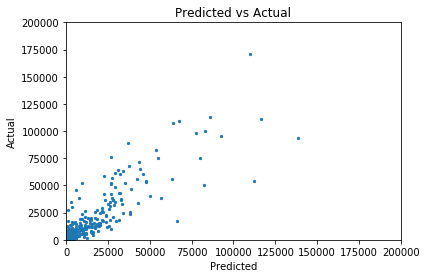

In [237]:
plt.scatter(predictions1_all, test_labels1_all, s = 5)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Predicted vs Actual')
plt.ylim(0, 200000)
plt.xlim(0, 200000)
plt.show()

(0, 200000)

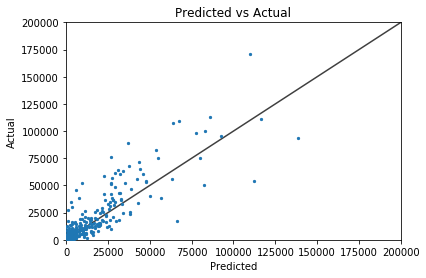

In [261]:
fig, ax = plt.subplots()
ax.scatter(predictions1_all, test_labels1_all, s=5, zorder=10)

lims = [
    np.min([ax.get_xlim(), ax.get_ylim()]),  # min of both axes
    np.max([ax.get_xlim(), ax.get_ylim()]),  # max of both axes
]

# now plot both limits against eachother
ax.plot(lims, lims, 'k-', alpha=0.75, zorder=0)
plt.title('Predicted vs Actual')
plt.xlabel('Predicted')
plt.ylabel('Actual')
# ax.set_aspect('equal')
ax.set_xlim(0,200000)
ax.set_ylim(0,200000)

In [248]:
# Get numerical feature importances
importances = list(rf_search.best_estimator_.feature_importances_)
# List of tuples with variable and importance
feature_importances = [(feature, round(importance, 2)) for feature, importance in zip(feature_list, importances)]
# Sort the feature importances by most important first
feature_importances = sorted(feature_importances, key = lambda x: x[1], reverse = True)
# Print out the feature and importances 
[print('Variable: {:20} Importance: {}'.format(*pair)) for pair in feature_importances];

Variable: likes                Importance: 0.47
Variable: rating               Importance: 0.18
Variable: dislikes             Importance: 0.09
Variable: subscriberCount      Importance: 0.09
Variable: length               Importance: 0.05
Variable: date_published       Importance: 0.05
Variable: time_since_published Importance: 0.05
Variable: compound_description Importance: 0.01
Variable: compound_title       Importance: 0.0


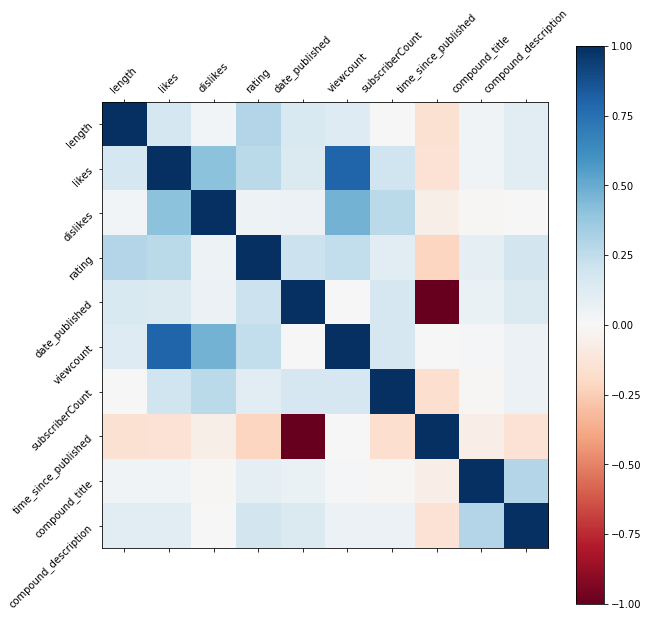

In [254]:
plt.figure(figsize=(10,10))
plt.matshow(woop.corr(), fignum=1, cmap = 'RdBu')
plt.xticks(range(len(woop.columns)), woop.columns, rotation=45)
plt.yticks(range(len(woop.columns)), woop.columns, rotation=45)
plt.colorbar()
plt.show()